In [1]:
%pwd
%load_ext autoreload
%autoreload 2

In [2]:
import configparser
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

In [7]:
import radiosonde

# Test on Sqlite3SondeLoader (Specifically for CFOG)

In [8]:
from radiosonde import SQLite3SondeLoader

In [9]:
config = configparser.ConfigParser(interpolation=configparser.ExtendedInterpolation())
config.read("/scratch365/swang18/Workspace/Areas/Research/C-FOG/config.d/overview.ini")

['/scratch365/swang18/Workspace/Areas/Research/C-FOG/config.d/overview.ini']

In [27]:
sonde_loader = SQLite3SondeLoader(config.get('Sharp', 'radiosonde'))

In [28]:
avail_sondes = sonde_loader.available(criteria={'t_range': ('2018-09-12 05:00', '2018-09-15 20:00')})

In [29]:
avail_sondes.loc[:,'LaunchTime'].values

array(['2018-09-12T17:21:23.174774000', '2018-09-12T17:21:23.174774000',
       '2018-09-12T20:15:31.801900000', '2018-09-12T20:15:31.801900000',
       '2018-09-12T23:11:19.098899000', '2018-09-12T23:11:19.098899000',
       '2018-09-13T01:00:13.102223000', '2018-09-13T01:00:13.102223000',
       '2018-09-13T02:19:07.448403000', '2018-09-13T02:19:07.448403000',
       '2018-09-13T05:19:56.172475000', '2018-09-13T05:19:56.172475000',
       '2018-09-13T08:14:01.905403000', '2018-09-13T08:14:01.905403000',
       '2018-09-13T11:30:57.024863000', '2018-09-13T11:30:57.024863000',
       '2018-09-13T23:13:19.578148000', '2018-09-13T23:13:19.578148000',
       '2018-09-14T11:14:03.192330000', '2018-09-14T11:14:03.192330000',
       '2018-09-14T23:15:00.983180000', '2018-09-14T23:15:00.983180000',
       '2018-09-15T11:22:28.253348000', '2018-09-15T11:22:28.253348000'],
      dtype='datetime64[ns]')

In [48]:
time = avail_sondes.loc[3,'LaunchTime'].to_pydatetime()

In [49]:
time.strftime('%F %H:%M:%S.%f')

'2018-09-12 20:15:31.801900'

In [50]:
sonde = sonde_loader.load_one(time)

select * from sonde where LaunchTime='2018-09-12 20:15:31.801900'
Empty DataFrame
Columns: [timestamp, Pressure, Temperature, Humidity, WindDir, WindSpeed, WindNorth, WindEast, Height, WindInterpolated, Latitude, Longitude, North, East, Up, Altitude, Dropping, LaunchTime, LaunchLatitude, LaunchLongitude]
Index: []


IndexError: index 0 is out of bounds for axis 0 with size 0

In [55]:
cursor = sonde_loader.conn.execute("select * from sonde where LaunchTime='2018-09-12 20:15:31.801900'")

In [56]:
cursor.fetchall()

[]

In [46]:
sonde_list = sonde_loader.load_many([t.to_pydatetime() for t in avail_sondes['LaunchTime']])

IndexError: index 0 is out of bounds for axis 0 with size 0

In [47]:
[t.to_pydatetime() for t in avail_sondes['LaunchTime']]

[datetime.datetime(2018, 9, 12, 17, 21, 23, 174774),
 datetime.datetime(2018, 9, 12, 17, 21, 23, 174774),
 datetime.datetime(2018, 9, 12, 20, 15, 31, 801900),
 datetime.datetime(2018, 9, 12, 20, 15, 31, 801900),
 datetime.datetime(2018, 9, 12, 23, 11, 19, 98899),
 datetime.datetime(2018, 9, 12, 23, 11, 19, 98899),
 datetime.datetime(2018, 9, 13, 1, 0, 13, 102223),
 datetime.datetime(2018, 9, 13, 1, 0, 13, 102223),
 datetime.datetime(2018, 9, 13, 2, 19, 7, 448403),
 datetime.datetime(2018, 9, 13, 2, 19, 7, 448403),
 datetime.datetime(2018, 9, 13, 5, 19, 56, 172475),
 datetime.datetime(2018, 9, 13, 5, 19, 56, 172475),
 datetime.datetime(2018, 9, 13, 8, 14, 1, 905403),
 datetime.datetime(2018, 9, 13, 8, 14, 1, 905403),
 datetime.datetime(2018, 9, 13, 11, 30, 57, 24863),
 datetime.datetime(2018, 9, 13, 11, 30, 57, 24863),
 datetime.datetime(2018, 9, 13, 23, 13, 19, 578148),
 datetime.datetime(2018, 9, 13, 23, 13, 19, 578148),
 datetime.datetime(2018, 9, 14, 11, 14, 3, 192330),
 datetime.da

In [68]:
# Test the accessor methods
print(sonde.launch_lat, sonde.launch_lon, sonde.launch_time)
print(type(sonde.height))

42.81980895996094 -63.355403900146484 BaseDatetime(2018, 9, 3, 23, 11, 31, 625282, tzinfo=None)
<class 'pint_pandas.pint_array.PintArray'>


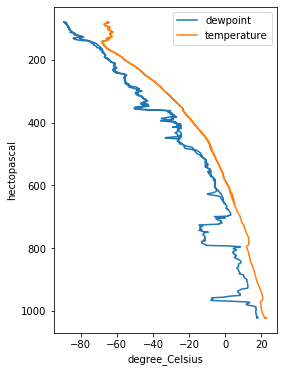

In [66]:
fig, ax = plt.subplots(figsize=(4,6))
ax.plot(sonde.dewpoint, sonde.pressure, label='dewpoint')
ax.plot(sonde.temperature, sonde.pressure, label='temperature')
ax.legend()
ax.invert_yaxis()